# Differential Equations
- Differential equation functionality in Julia with explanation

### Basics: Functions and Derivatives
- Functions can be defined using syntax equivalent to the mathematical notation
- Derivatives are not built in to Julia's standard library, so I have included the following libraries
- https://github.com/JuliaSymbolics/Symbolics.jl
- https://github.com/SciML/ModelingToolkit.jl
- https://github.com/SciML/DifferentialEquations.jl

In [1]:
using Symbolics

# declare a variable to differente with respect to
@variables x
D = Differential(x)

# define function with symbolic variable x
y = x^3

# calculate derivative
dy = D(y) |> expand_derivatives

3(x^2)

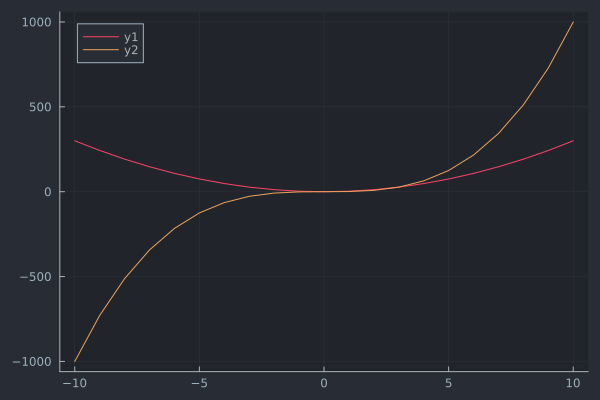

In [2]:
using Plots
theme(:juno)

# convert symbolic expression to Julia function
dy = build_function(dy, x, expression = Val{false}) |> eval
y = build_function(y, x, expression = Val{false}) |> eval

plot!(-10:10, dy)
plot!(-10:10, y)

### First Order ODE
- A first-order ODE is an equality relation between a function and its first derivative
- A solution to an ODE is a function rather than a numerical value
- A solution is valid if it satisfies the equality relation
- e.g. y = y', a valid solution is y = e^x
- However, most differential equations can only be approximated via computation from an initial condition

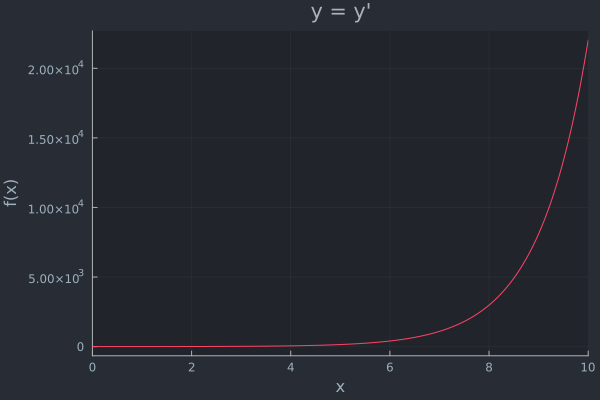

In [3]:
using DifferentialEquations, Plots

u₀ = 2 # initial condition
domain = (0, 10)
f(u, p, x) = ℯ^x
problem = ODEProblem(f, u₀, domain)
solution = solve(problem, Tsit5())

plot(
    solution, 
    title = "y = y'", 
    xaxis = "x",
    yaxis = "f(x)", 
    label = nothing
)

### Second Order ODE
- Second-order ODEs are relations between a function and its second derivative
- Pendulum motion can be modeled with these types of ODEs (relating distance, velocity, and acceleration)

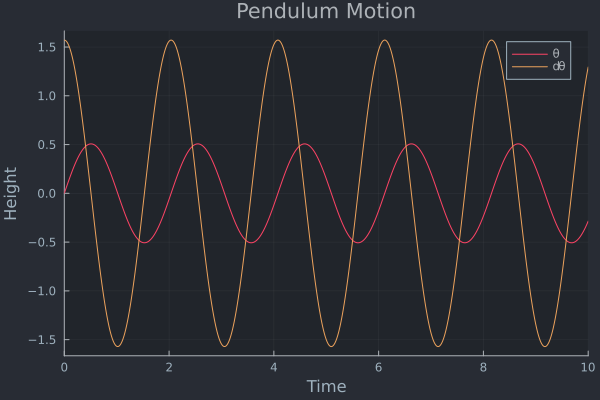

In [4]:
const g = 9.81
L = 1.0

u₀ = [0, π / 2]
tspan = (0.0, 10)

function pendulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g / L) * sin(θ)
end

problem = ODEProblem(pendulum, u₀, tspan)
solution = solve(problem, Tsit5())

plot(
    solution, 
    title = "Pendulum Motion", 
    xaxis = "Time",
    yaxis = "Height", 
    label = ["\\theta" "d\\theta"]
)

### Partial Differential Equations (PDEs)
- While ODEs relate functions to their derivatives in one dimension, PDEs relate functions to their derivatives with respect to multiple dimensions.
- e.g. modeling the dispersion of heat through a cube over time involves derivatives along the x, y, z, and t dimensions.
- PDEs are generally translated into linear, non-linear, or ordinary differential equations so that performant solvers can be applied to the problem.
- You might also try to learn the shape of the PDE using stochastic methods / neural networks, although these can lead to inaccuracies.